In [1]:
# -*- coding: utf-8 -*-
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import time
import numpy as np
from IPython.display import Image  


In [2]:
# 解决matplotlib显示中文问题
# 仅适用于Windows
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [3]:
cancer = load_breast_cancer()

# 按照7:3比例分割数据集
train_data = cancer.data[0:400]
train_target = cancer.target[0:400]
test_data = cancer.data[400:]
test_target = cancer.target[400:]

# 决策树最深深度对结果影响

In [10]:
max_depth_list = [4, 5, 6, 7, 8]

tree_models = []
tree_scores = []
tree_durations = []

for max_depth in max_depth_list:
    print('训练决策树（max_depth={}）...'.format(max_depth), end='')
    clf = DecisionTreeClassifier(max_depth=max_depth)
    # 训练模型
    start = time.time()
    clf.fit(train_data, train_target)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 输出生成树的大小
    print('生成树最深深度为：', clf.get_depth(), end=',')
    print('生成树叶子结点为：', clf.get_n_leaves(), end=',')
    
    # 验证模型，输出模型准确率
    score = clf.score(test_data, test_target)
    print('准确率：{:.3f}'.format(score))
    
    # 输出分类评价
    predict_target = clf.predict(test_data)
    print('模型分类评价：\n', metrics.classification_report(test_target, predict_target))
    print('混淆矩阵：\n', metrics.confusion_matrix(test_target, predict_target))
    print('------------------------------------------------------------')
    
    # 添加树模型到列表
    tree_models.append(clf)
    tree_durations.append(duration)
    tree_scores.append(score)
    
    
print('\n经过以上测试，汇总结果如下：')
tree_mean_duration = np.mean(tree_durations)
print('训练决策树平均耗时{:.4f}s'.format(tree_mean_duration))

# 记录最优模型
best_idx = np.argmax(tree_scores)
best_tree_acc = tree_scores[best_idx]
print('最优的决策树模型，最大深度为{}，准确率：{:.3f}'.format(tree_models[best_idx].get_params()['max_depth'], best_tree_acc))

训练决策树（max_depth=4）...耗时0.0050s, 生成树最深深度为： 4,生成树叶子结点为： 10,准确率：0.893
模型分类评价：
               precision    recall  f1-score   support

           0       0.69      0.97      0.81        39
           1       0.99      0.87      0.93       130

    accuracy                           0.89       169
   macro avg       0.84      0.92      0.87       169
weighted avg       0.92      0.89      0.90       169

混淆矩阵：
 [[ 38   1]
 [ 17 113]]
------------------------------------------------------------
训练决策树（max_depth=5）...耗时0.0050s, 生成树最深深度为： 5,生成树叶子结点为： 12,准确率：0.893
模型分类评价：
               precision    recall  f1-score   support

           0       0.69      0.97      0.81        39
           1       0.99      0.87      0.93       130

    accuracy                           0.89       169
   macro avg       0.84      0.92      0.87       169
weighted avg       0.92      0.89      0.90       169

混淆矩阵：
 [[ 38   1]
 [ 17 113]]
------------------------------------------------------------
训练决策树（max_de

# 决策树特征选择标准对结果影响

In [5]:
criterion_list = ['gini', 'entropy']

tree_models = []
tree_scores = []
tree_durations = []

for criterion in criterion_list:
    print('训练决策树（criterion={}）...'.format(criterion), end='')
    clf = DecisionTreeClassifier(criterion=criterion)
    
    # 训练模型
    start = time.time()
    clf.fit(train_data, train_target)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 输出生成树的大小
    print('生成树最深深度为：', clf.get_depth(), end=',')
    print('生成树叶子结点为：', clf.get_n_leaves(), end=',')
    
    # 验证模型，输出模型准确率
    score = clf.score(test_data, test_target)
    print('准确率：{:.3f}'.format(score))
    
    # 输出分类评价
    predict_target = clf.predict(test_data)
    print('模型分类评价：\n', metrics.classification_report(test_target, predict_target))
    print('混淆矩阵：\n', metrics.confusion_matrix(test_target, predict_target))
    print('------------------------------------------------------------')
    
    # 添加树模型到列表
    tree_models.append(clf)
    tree_durations.append(duration)
    tree_scores.append(score)
    
    
print('\n经过以上测试，汇总结果如下：')
tree_mean_duration = np.mean(tree_durations)
print('训练决策树平均耗时{:.4f}s'.format(tree_mean_duration))

# 记录最优模型
best_idx = np.argmax(tree_scores)
best_tree_acc = tree_scores[best_idx]
print('最优的决策树模型，特征选择标准为{}，准确率：{:.3f}'.format(tree_models[best_idx].get_params()['criterion'], best_tree_acc))

训练决策树（criterion=gini）...耗时0.0162s, 生成树最深深度为： 8,生成树叶子结点为： 18,准确率：0.870
模型分类评价：
               precision    recall  f1-score   support

           0       0.64      0.97      0.78        39
           1       0.99      0.84      0.91       130

    accuracy                           0.87       169
   macro avg       0.82      0.91      0.84       169
weighted avg       0.91      0.87      0.88       169

混淆矩阵：
 [[ 38   1]
 [ 21 109]]
------------------------------------------------------------
训练决策树（criterion=entropy）...耗时0.0127s, 生成树最深深度为： 6,生成树叶子结点为： 14,准确率：0.929
模型分类评价：
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        39
           1       0.99      0.92      0.95       130

    accuracy                           0.93       169
   macro avg       0.88      0.94      0.91       169
weighted avg       0.94      0.93      0.93       169

混淆矩阵：
 [[ 38   1]
 [ 11 119]]
------------------------------------------------------------

经过

# 决策树叶子结点最小样本数对结果影响

In [11]:
min_samples_leaf_list = [1, 2, 3, 4, 5]

tree_models = []
tree_scores = []
tree_durations = []

for min_samples_leaf in min_samples_leaf_list:
    print('训练决策树（min_samples_leaf={}）...'.format(min_samples_leaf), end='')
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    # 训练模型
    start = time.time()
    clf.fit(train_data, train_target)
    
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration), end=', ')
    
    # 输出生成树的大小
    print('生成树最深深度为：', clf.get_depth(), end=',')
    print('生成树叶子结点为：', clf.get_n_leaves(), end=',')
    
    # 验证模型，输出模型准确率
    score = clf.score(test_data, test_target)
    print('准确率：{:.3f}'.format(score))
    
    # 输出分类评价
    predict_target = clf.predict(test_data)
    print('模型分类评价：\n', metrics.classification_report(test_target, predict_target))
    print('混淆矩阵：\n', metrics.confusion_matrix(test_target, predict_target))
    print('------------------------------------------------------------')
    
    # 添加树模型到列表
    tree_models.append(clf)
    tree_durations.append(duration)
    tree_scores.append(score)
    
    
print('\n经过以上测试，汇总结果如下：')
tree_mean_duration = np.mean(tree_durations)
print('训练决策树平均耗时{:.4f}s'.format(tree_mean_duration))

# 记录最优模型
best_idx = np.argmax(tree_scores)
best_tree_acc = tree_scores[best_idx]
print('最优的决策树模型，叶子结点最小样本数{}，准确率：{:.3f}'.format(tree_models[best_idx].get_params()['min_samples_leaf'], best_tree_acc))

训练决策树（min_samples_leaf=1）...耗时0.0221s, 生成树最深深度为： 8,生成树叶子结点为： 18,准确率：0.852
模型分类评价：
               precision    recall  f1-score   support

           0       0.62      0.95      0.75        39
           1       0.98      0.82      0.90       130

    accuracy                           0.85       169
   macro avg       0.80      0.89      0.82       169
weighted avg       0.90      0.85      0.86       169

混淆矩阵：
 [[ 37   2]
 [ 23 107]]
------------------------------------------------------------
训练决策树（min_samples_leaf=2）...耗时0.0040s, 生成树最深深度为： 7,生成树叶子结点为： 17,准确率：0.888
模型分类评价：
               precision    recall  f1-score   support

           0       0.68      0.97      0.80        39
           1       0.99      0.86      0.92       130

    accuracy                           0.89       169
   macro avg       0.83      0.92      0.86       169
weighted avg       0.92      0.89      0.89       169

混淆矩阵：
 [[ 38   1]
 [ 18 112]]
-----------------------------------------------------------

# 最优决策树相关分析

In [4]:
# 输入最佳决策树参数
clf = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=3)

# 训练模型
start = time.time()
clf.fit(train_data, train_target)

# 计时
end = time.time()
duration = end - start
print('耗时{:.4f}s'.format(duration), end=', ')

# 输出生成树的大小
print('生成树最深深度为：', clf.get_depth(), end=',')
print('生成树叶子结点为：', clf.get_n_leaves(), end=',')

# 验证模型，输出模型准确率
score = clf.score(test_data, test_target)
print('准确率：{:.3f}'.format(score))

# 输出分类评价
predict_target = clf.predict(test_data)
print('模型分类评价：\n', metrics.classification_report(test_target, predict_target))
print('混淆矩阵：\n', metrics.confusion_matrix(test_target, predict_target))
print('------------------------------------------------------------')


耗时0.0132s, 生成树最深深度为： 5,生成树叶子结点为： 12,准确率：0.935
模型分类评价：
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        39
           1       0.99      0.92      0.96       130

    accuracy                           0.93       169
   macro avg       0.89      0.95      0.91       169
weighted avg       0.95      0.93      0.94       169

混淆矩阵：
 [[ 38   1]
 [ 10 120]]
------------------------------------------------------------


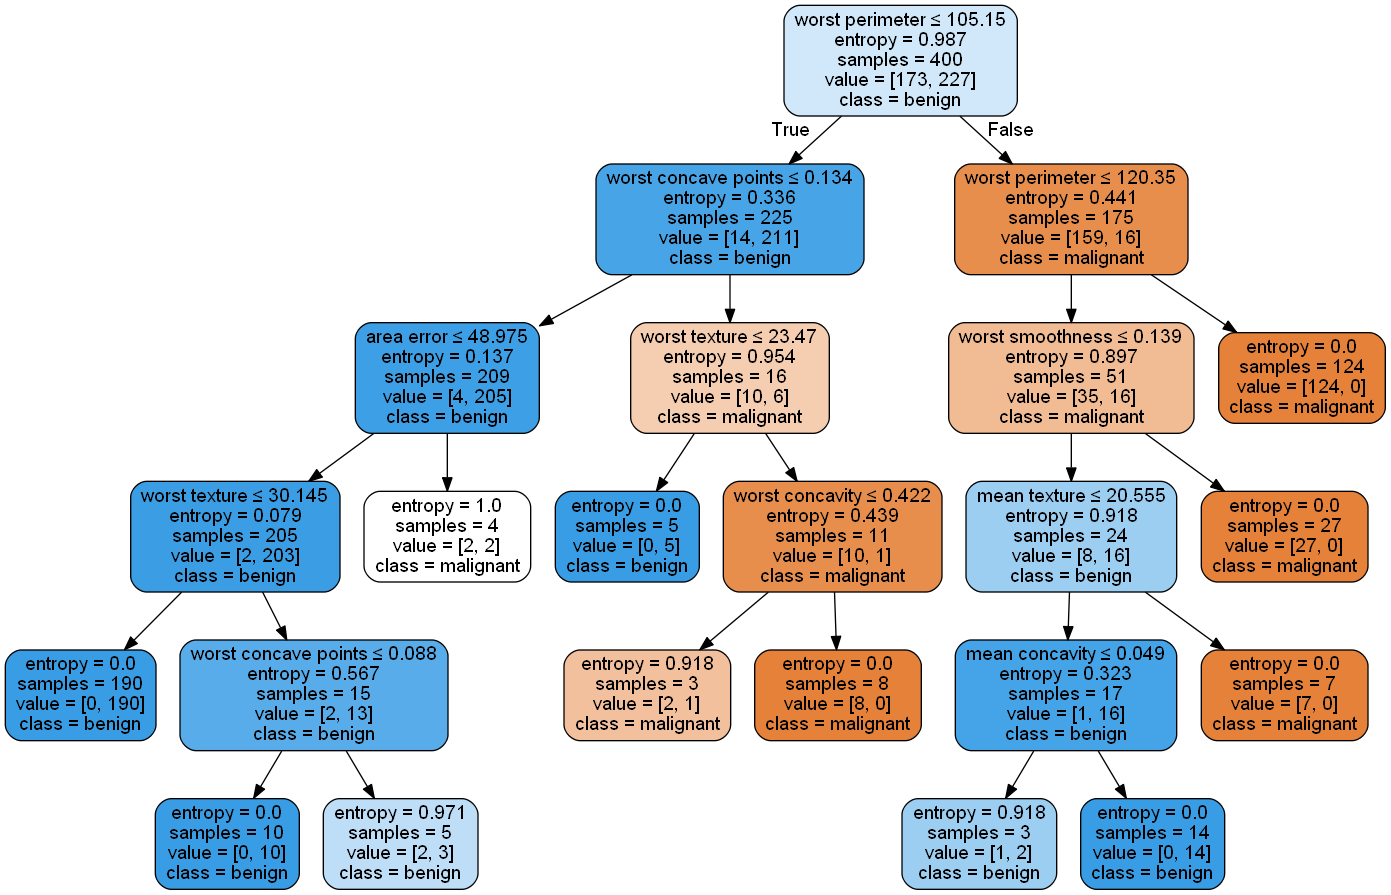

In [6]:
# 决策树可视化
from IPython.display import Image  
from sklearn import tree
import pydotplus 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

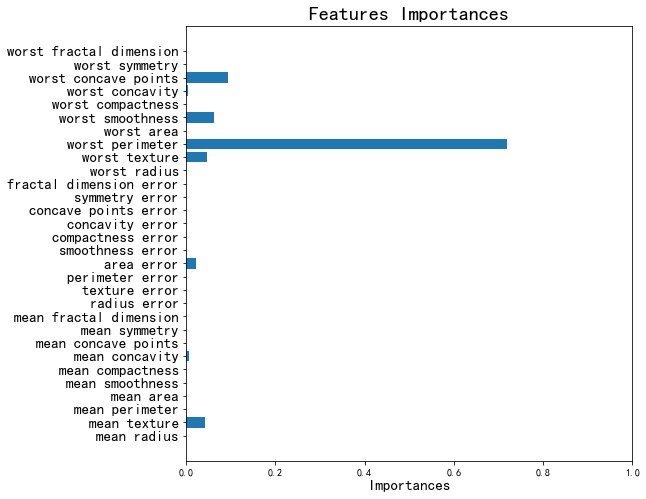

In [22]:
# 特征重要度排序
y_importances = clf.feature_importances_
x_importances = cancer.feature_names
y_pos = np.arange(len(x_importances))

# 绘图
plt.figure(figsize = (8,8))
plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances, fontsize=15)
plt.xlabel('Importances', fontsize=15)
plt.xlim(0,1)
plt.title('Features Importances', fontsize=20)
plt.show()

In [30]:
# 输出列表中最大的两个值序号，即最重要的两个特征
y_importances = clf.feature_importances_
best_2_idx = y_importances.argsort()[-2:][::-1]
print(best_2_idx)

[22 27]


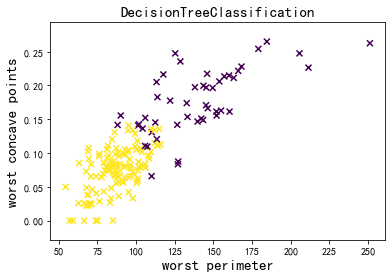

In [35]:
X = test_data
L1 = [x[22] for x in X]
L2 = [x[27] for x in X]

plt.scatter(L1,L2,c=predict_target,marker='x')
plt.xlabel(cancer.feature_names[22], fontsize=15)
plt.ylabel(cancer.feature_names[27], fontsize=15)
plt.title("DecisionTreeClassification", fontsize=15)
plt.show()

# 朴素贝叶斯模型（高斯模型）

In [37]:
from sklearn.naive_bayes import GaussianNB

print('训练朴素贝叶斯模型...', end='')
gnb = GaussianNB()

# 训练模型
start = time.time()
gnb.fit(train_data, train_target)

# 计时
end = time.time()
duration = end - start
print('耗时{:.4f}s'.format(duration), end=', ')

# 验证模型，输出模型准确率
score = gnb.score(test_data, test_target)
print('准确率：{:.3f}'.format(score))

# 输出分类评价
predict_target = gnb.predict(test_data)
print('模型分类评价：\n', metrics.classification_report(test_target, predict_target))
print('混淆矩阵：\n', metrics.confusion_matrix(test_target, predict_target))
print('------------------------------------------------------------')


训练朴素贝叶斯模型...耗时0.0030s, 准确率：0.964
模型分类评价：
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.98      0.97      0.98       130

    accuracy                           0.96       169
   macro avg       0.94      0.96      0.95       169
weighted avg       0.97      0.96      0.96       169

混淆矩阵：
 [[ 37   2]
 [  4 126]]
------------------------------------------------------------
